In [1]:
import time
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowError
import matplotlib.pyplot as plt
import numpy as np
from brainflow.data_filter import DataFilter, FilterTypes

In [ ]:
params = BrainFlowInputParams()
params.serial_port = 'COM9' 

boardId = BoardIds.CYTON_BOARD

try: 
    board = BoardShim(boardId, params)
    board.prepare_session()
    
    print('Board succesfully prepared')
except Exception as e:
    print(e)
    

print('Getting new data')
board.start_stream()
time.sleep(5) # get 5 seconds of data
data = board.get_board_data()
print('Ending stream')
board.stop_stream()
board.release_session()


Board succesfully prepared
Getting new data
Ending stream


In [18]:
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(24, 1232)


In [19]:
eeg_channels = board.get_eeg_channels(boardId)
print(eeg_channels)
marker_channel = board.get_marker_channel(boardId)
print('Marker channel: ', marker_channel)
eeg_data = data[eeg_channels]

[1, 2, 3, 4, 5, 6, 7, 8]
Marker channel:  23


In [20]:
print(eeg_data)

[[     0.          12918.79420505  12571.22457876 ...  12222.44795828
   12576.38783173  12770.22215965]
 [     0.           4367.82143924   4056.32752852 ...   3834.6876305
    4302.26377276   4289.23270574]
 [     0.         -91108.97375452 -83194.93629872 ... -84739.97828245
  -94123.01708734 -96463.2894353 ]
 ...
 [     0.         187500.         187500.         ... 187500.
  187500.         187500.        ]
 [     0.           2000.79405317   1364.52929551 ...    490.30786637
    1049.59321613   1390.01028419]
 [     0.          -2786.30140857  -3348.22426417 ...  -3741.79378054
   -2953.31364314  -2969.71982357]]


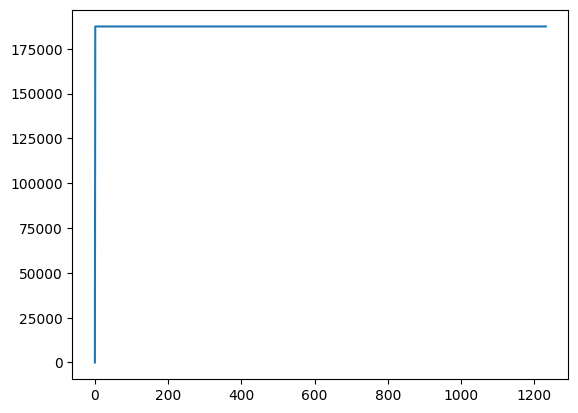

In [21]:
plt.plot(np.arange(eeg_data.shape[1]), eeg_data[5])

In [22]:
print(eeg_data.shape[1]) #second column
print(eeg_data[4])

1232
[     0.         -28749.46191901 -29236.12645103 ... -29384.69849642
 -28495.72491595 -28745.0362736 ]


In [23]:
print(boardId)

0


Session prepared, starting stream
Inserted marker 1
Inserted marker 2
Inserted marker 3
Inserted marker 4
Inserted marker 5
Endind stream and releasing session


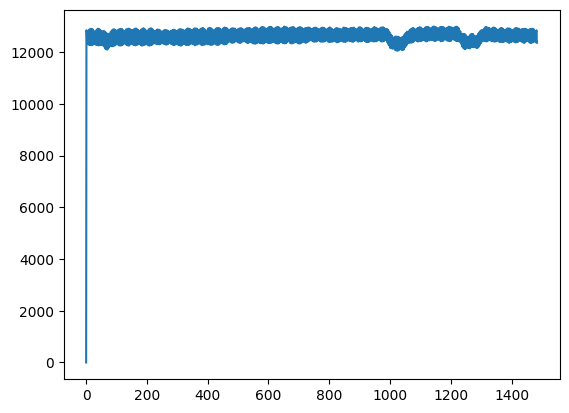

In [24]:
# now i will read some data, again and filter it 

try:
    board.prepare_session()
    print('Session prepared, starting stream')
    board.start_stream()
except BrainFlowError as e:
    print('Failed to connect to headset')
    print(e)

#insert a marker every second
for x in range(5):
    time.sleep(1)
    board.insert_marker(x+1) # 0 is reserved for no stimulus
    print('Inserted marker', x+1)
time.sleep(1)
data = board.get_board_data()
print('Endind stream and releasing session')
board.stop_stream()
board.release_session()

egg_channels = board.get_eeg_channels(boardId)
egg_data = data[egg_channels]
plt.plot(np.arange(egg_data.shape[1]), egg_data[0])


In [25]:
markers = data[marker_channel]
print(markers)

[0. 0. 0. ... 0. 0. 0.]


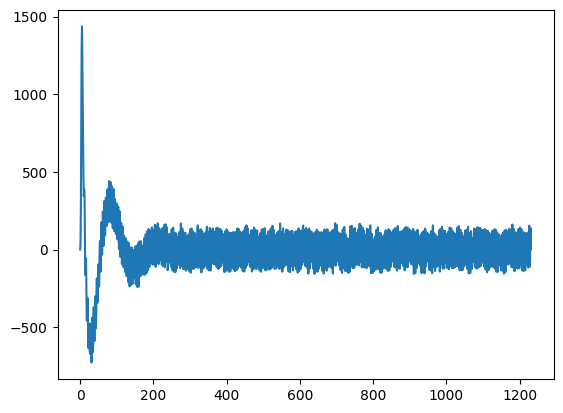

In [ ]:
plt.close('all') #delete the past plot

#filtering data 
samplingRate = BoardShim.get_sampling_rate(boardId)
for channel in range(eeg_data.shape[0]):
    DataFilter.perform_lowpass(eeg_data[channel], samplingRate, 50.0, 5, FilterTypes.BUTTERWORTH, 1)
    DataFilter.perform_highpass(eeg_data[channel], samplingRate, 2.0, 4, FilterTypes.BUTTERWORTH, 0)
    DataFilter.perform_bandstop(eeg_data[channel], samplingRate, 58.0, 62.0, 4, FilterTypes.BUTTERWORTH, 0)
   
plt.plot(np.arange(eeg_data.shape[1]), eeg_data[6])